In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import glob
from PIL import Image

In [7]:
all_ims = glob.glob('/media/drn/datasets/cityscapes/ft_cityscapes_end2end_v3_lpgan10/*')
with open('/media/drn/datasets/cityscapes/train_images.txt') as t_file:
    t_ims = t_file.readlines()
with open('/media/drn/datasets/cityscapes/train_labels.txt') as t_file:
    t_lbls = t_file.readlines()

tt=''
ll = ''
for i in t_ims:
    tt += i
for i in t_lbls:
    ll += i

for i in all_ims:
    if 'spade_fff_128' in i:
        if i.replace('spade_fff','label19') in all_ims:
            tt+= '%s\n'%(i.replace('/media/drn/datasets/cityscapes/',''))
            ll+= '%s\n'%(i.replace('spade_fff','label19').replace('/media/drn/datasets/cityscapes/',''))

print(len(all_ims))
with open('/media/drn/datasets/cityscapes/augmented_1000_train_labels.txt','w') as file: 
    file.write(ll)
    
with open('/media/drn/datasets/cityscapes/augmented_1000_train_images.txt','w') as file: 
    file.write(tt)

6000


In [5]:
all_ims[0]

'/mnt/disks/sazadi/drn/datasets/cityscapes/cityscapes_segall_1gpu_T1_nsem_35_gumbel'

In [17]:
for i in glob.glob("/mnt/disks/sazadi/drn/datasets/cityscapes/cityscapes_segall_1gpu_T1_nsem_35_gumbel_syncBN/*_label19_128_298900.png"):
    a=Image.open(i)
    m=max(set(np.array(a).flatten())-set([255]))
    assert(m<19)

In [16]:
set(np.array(a).flatten())-set([255])

{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 18, 34}

In [1]:
!ln -s /mnt/disks/sazadi/drn/datasets/cityscapes/leftImg8bit /mnt/disks/sazadi/segGAN/dynamo/datasets/cityscapes/leftImg8bit




In [1]:
!ln -s /mnt/disks/sazadi/drn/datasets/cityscapes /home/sazadi/projects/segGAN/dynamo/datasets/cityscapes

In [3]:
#cityscapes 20k

In [9]:
ims = glob.glob('/shared/sazadi/data1/dataset/cityscapes/leftImg8bit_trainextra/leftImg8bit/train_extra/*/*.png')
ims_txt = ''
for im in ims:
    if 'troisdorf/troisdorf_000000_000073_leftImg8bit.png' in im:
        continue
    ims_txt += '%s\n'%im.replace('/shared/sazadi/data1/dataset/cityscapes/','')
    
with open('/shared/sazadi/data1/dataset/cityscapes/cityscapes_20ktest_images.txt','w') as file: 
    file.write(ims_txt)

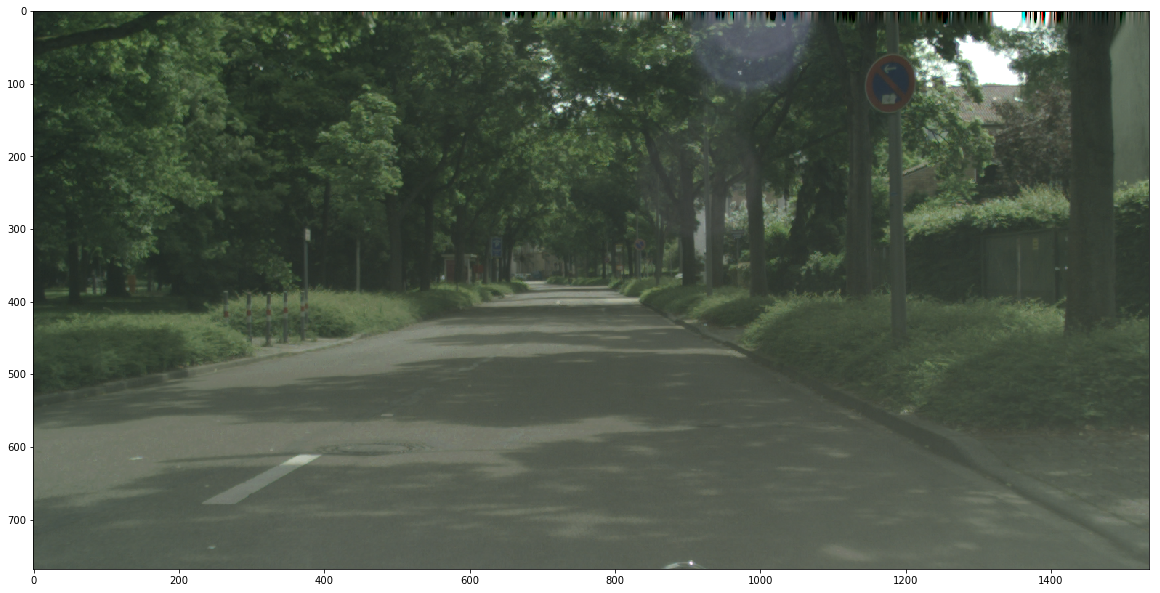

In [65]:
im = Image.open('/shared/sazadi/data1/dataset/cityscapes/leftImg8bit_trainextra/leftImg8bit/train_extra/karlsruhe/karlsruhe_000000_000069_leftImg8bit.png')
figure(figsize=(20,40))
imshow(np.array(im)[0:-256,256:-256,:])

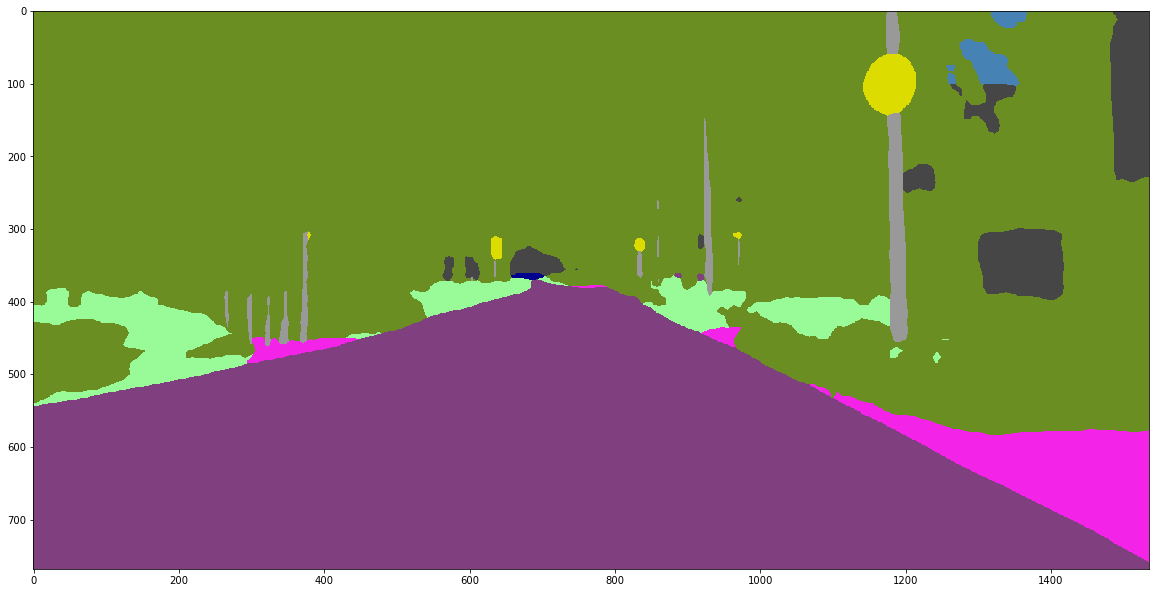

In [66]:
im = Image.open('/shared/sazadi/data1/drn/output/cityscapes_20k/drn_d_105_000_test_color/leftImg8bit_trainextra/leftImg8bit/train_extra/karlsruhe/karlsruhe_000000_000069_leftImg8bit.png')
im = np.array(im)[0:-256,256:-256,:]
figure(figsize=(20,40))
imshow((im))


In [26]:
segs = glob.glob('/shared/sazadi/data1/drn/output/cityscapes_20k/drn_d_105_000_test/leftImg8bit_trainextra/leftImg8bit/train_extra/*/*.png')
ll=[]
for seg in segs:
    s = np.array(Image.open(seg))
    ll.extend(np.unique(s))


In [28]:
np.unique(ll)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=uint8)